<a href="https://colab.research.google.com/github/jannat0718/jannat0718/blob/main/SMS_Spam_Ham_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Install packages
!pip3 install wordcloud

In [6]:
## Import Dependencies
import random
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [7]:
##From Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Load dataset
sms= pd.read_csv('/content/drive/MyDrive/NLP/SMS Classification/sms.tsv', header=None, sep='\t',names=['label', 'message'])
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [10]:
# get the class distribution
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham': 0, 'spam': 1})

In [12]:
# save the positive SMS
X_ham  = sms[(sms.label_num == 0)].message
X_spam = sms[(sms.label_num == 1)].message

In [13]:
# define X and y for use with CountVectorizer
# it is important you send 1 dimensional object to CountVectorizer, which
# it will use to convert to 2-dimensionsal objects
X = sms.message
y = sms.label_num

print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [14]:
from sklearn.model_selection import train_test_split
# split X and y into training ans testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


### vectorizing the dataset using CounterVectorizer

In [16]:
# instantiate the vectorizer
vect = CountVectorizer()

In [17]:
# Same can be achieved with 1 step also
# FASTER

X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [19]:
# Print the sparse matrix, only the 1s
print(X_train_dtm)

  (0, 509)	1
  (0, 3181)	1
  (0, 5193)	1
  (0, 4781)	1
  (0, 3971)	1
  (0, 5479)	1
  (0, 3880)	1
  (0, 1572)	1
  (0, 4987)	1
  (0, 2864)	2
  (0, 3170)	1
  (0, 7424)	1
  (0, 4983)	1
  (0, 264)	1
  (0, 1552)	1
  (0, 4375)	1
  (0, 4743)	1
  (0, 50)	1
  (0, 6656)	1
  (0, 6892)	1
  (0, 4662)	1
  (0, 4779)	1
  (0, 2022)	1
  (1, 2222)	1
  (1, 7420)	1
  :	:
  (4177, 4255)	1
  (4177, 4446)	1
  (4177, 4778)	1
  (4177, 2744)	1
  (4177, 254)	1
  (4177, 5490)	1
  (4177, 2556)	1
  (4177, 4508)	1
  (4177, 6034)	1
  (4177, 6662)	1
  (4177, 307)	1
  (4177, 837)	1
  (4177, 3700)	1
  (4177, 5796)	1
  (4177, 358)	1
  (4177, 4934)	1
  (4177, 2453)	1
  (4177, 2097)	1
  (4177, 5403)	1
  (4177, 2786)	1
  (4177, 6577)	1
  (4178, 1691)	1
  (4178, 4238)	1
  (4178, 7257)	1
  (4178, 5999)	1


In [20]:
# Get all the tokens/features
X_train_tokens = vect.get_feature_names()  # feature integer indices to feature name
len(X_train_tokens)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


7456

In [22]:
#Print the token name and frequency
vect.vocabulary_.items()

dict_items([('4mths', 509), ('half', 3181), ('price', 5193), ('orange', 4781), ('line', 3971), ('rental', 5479), ('latest', 3880), ('camera', 1572), ('phones', 4987), ('free', 2864), ('had', 3170), ('your', 7424), ('phone', 4983), ('11mths', 264), ('call', 1552), ('mobilesdirect', 4375), ('on', 4743), ('08000938767', 50), ('to', 6656), ('update', 6892), ('now', 4662), ('or2stoptxt', 4779), ('cs', 2022), ('did', 2222), ('you', 7420), ('stitch', 6218), ('his', 3316), ('trouser', 6758), ('hope', 3362), ('enjoyed', 2502), ('new', 4580), ('content', 1916), ('text', 6514), ('stop', 6228), ('61610', 563), ('unsubscribe', 6882), ('help', 3276), ('08712400602450p', 98), ('provided', 5255), ('by', 1538), ('tones2you', 6683), ('co', 1810), ('uk', 6829), ('not', 4647), ('heard', 3255), ('from', 2899), ('u4', 6823), ('while', 7199), ('rude', 5612), ('chat', 1691), ('private', 5206), ('01223585334', 5), ('cum', 2040), ('wan', 7075), ('2c', 374), ('pics', 5002), ('of', 4704), ('me', 4238), ('gettin',

In [23]:
# Print the dense matrix, both 1s and 0s
X_train_dtm.toarray()  ##Dense Array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
# Create dataFramme putting Feature names and Dense array togather in the same frame
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Transform testing data (using fitted vocabulary) into a document-term maxtri
# Test data-Did not do fit
# Matrix will be Number of testing samples x No of features in Vect (training)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

##Naive Bayes classifier

In [26]:
##Initiate Naive Bayes classifier which is suitable for classification with discrete features
nb = MultinomialNB()

In [27]:
# train the model using X_train_dtm
# time it with an Ipython "magic command"
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [28]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [29]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
y_pred_class.shape

(1393,)

### Prediction Results ,Accuracy, Confusion matrix, Probability

In [31]:
# Calculate accuracy of class predictions
accuracy_score(y_test, y_pred_class)

0.9885139985642498

In [32]:
#Confusion Matrix
confusion_matrix(y_test, y_pred_class)

array([[1203,    5],
       [  11,  174]])

In [ ]:
## Understanding the Confusion matrix
#    +PP -PN
#P  TP  FN
#N  FP  TN

# Label 1 - POSITIVE (Spam)
# Label 0 - NEGATIVE (Ham)
# [[TP,  FN ],
#  [FP , TN]]
# FN - Falsely 'predicted' NEGATIVE- Type 2 error -less problematic as its includes all false information as positive rather than reject anything
# FP - Falsely 'predicted' POSITIVE - Type 1 error- More impactfull as its reject all positive information as negative class.

In [33]:
# FALSE NEGATIVE [Predicted Negative/0/ham massrge as Positive/1/spam.So these are Spam masseges but classified as ham] 
X_test[(y_test==1) & (y_pred_class ==0)]

# Same as
# X_test[y_pred_class < y_test==0]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [34]:
# FALSE POSITIVE [Predicted Positive/1/spam massage as Negative/0/ham .So these are Ham massage but classified as Spam] 
X_test[(y_test==0) & (y_pred_class ==1)]

# Same as
# X_test[y_pred_class > y_test==0]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [35]:
# Calculate the predicted proobabilities for X_test
nb.predict_proba(X_test_dtm)#[:10]
y_pred_proba = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_proba

array([2.87744864e-03, 1.83488846e-05, 2.07301295e-03, ...,
       1.09026171e-06, 1.00000000e+00, 3.98279868e-09])

## Plot Wordcloud

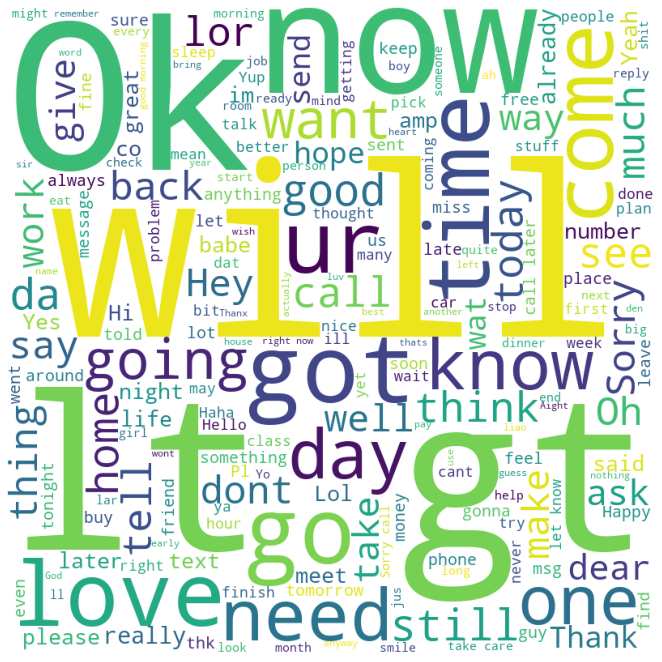

In [36]:
# plot the WordCloud image for Ham
wordcloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color ='white', 
                    #  stopwords = stopwords, 
                     min_font_size = 10).generate(' '.join(X_ham))
plt.figure(figsize = (9, 12), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

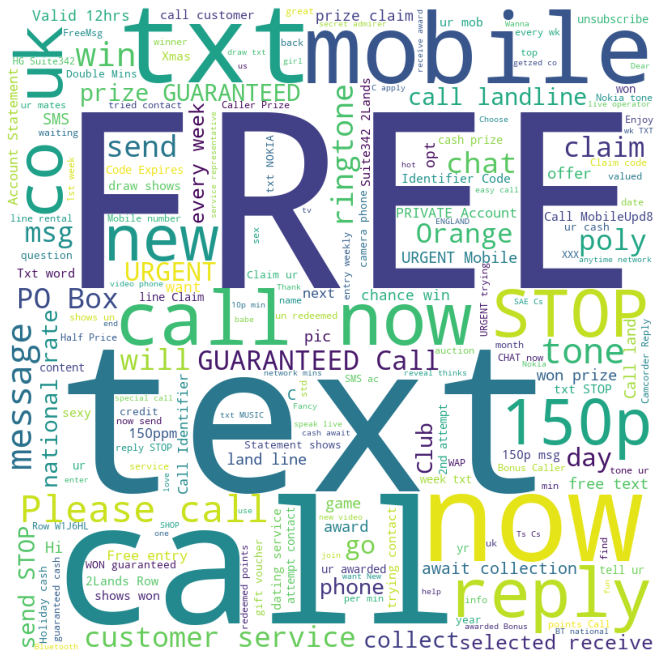

In [37]:
# plot the WordCloud image for Spam
wordcloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color ='white', 
                    #  stopwords = stopwords, 
                     min_font_size = 10).generate(' '.join(X_spam))
plt.figure(figsize = (9, 12), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)